Ejemplo tomado de [aquí](http://scipy.github.io/old-wiki/pages/Cookbook/Zombie_Apocalypse_ODEINT)
# Apocalipsis zombie
En este ejercicio, modelaremos un apocalipsis zombie usando ecuaciones diferenciales. 

Nuestro sistema de ecuaciones es:
\begin{align}
\frac{\mathrm{d}S}{\mathrm{d}t} &= P − \beta\,S\,Z - \gamma\,S, \\[2mm]
\frac{\mathrm{d}Z}{\mathrm{d}t} &= \beta\,S\,Z + \delta\,F - \alpha\,S\,Z \\[2mm]
\frac{\mathrm{d}F}{\mathrm{d}t} &= \gamma\,S + \alpha\,S\,Z - \delta\,F.
\end{align}
donde:

S es el número de personas sanas, 

Z el número de zombies,

F el número de fallecidos,

P la tasa de nacimiento,

$\gamma$ la tasa de mortalidad,

$\beta$ la tasa de zombificación de personas,

$\delta$ la tasa de zombificación de fallecidos,

$\alpha$ la tasa de destrucción de zombies.

Importamos los paquetes de python que utilizaremos:

In [8]:
# para que las gráficas salgan en esta página
%matplotlib inline
# para manejar matrices y demás datos numéricos
import numpy as np
# para graficar
import matplotlib.pyplot as plt
# para resolver ecuaciones diferenciales
from scipy.integrate import odeint
# para que nuestras gráficas se vean más bonitas
import seaborn as sns
# para hacer el tamaño de fuente más grande
sns.set(font_scale=2)
# Para hacer graficos SVG inline
%config InlineBackend.figure_format = 'svg'

Definimos nuestros parametros:

In [9]:
P = 100       
gamma = 0.0001  
beta = 0.0095  
delta = 0.0001  
alfa = 0.0001  

Codificamos nuestro sistema de ecuaciones:

In [10]:
def apocapilsis_zombie(y, t):
    	# Desempacamos valores iniciales
        Si = y[0] # personas
        Zi = y[1] # zombies
        Fi = y[2] # fallecidos
        # Ecuaciones
        dS = P - beta*Si*Zi - gamma*Si
        dZ = beta*Si*Zi + delta*Fi - alfa*Si*Zi
        dF = gamma*Si + alfa*Si*Zi - delta*Fi
        return [dS, dZ, dF]

Definimos las condiciones iniciales:

In [11]:
S0 = 500               # población inicial de gente sana
Z0 = 0                  # población inicial de zombies
R0 = 0.01 * S0          # población inicial de fallecidos
y0 = [S0, Z0, R0]       # empacamos condiciones iniciales
t  = np.linspace(0, 5, 1000)   # vector de tiempo

Finalmente, resolvemos el sistema de ecuaciones numéricamente:

In [12]:
soln = odeint(apocapilsis_zombie, y0, t)
# Desempacar las poblaciones
S = soln[:, 0]
Z = soln[:, 1]
F = soln[:, 2]

Ahora echamos un vistazo a los resultados gráficamente:

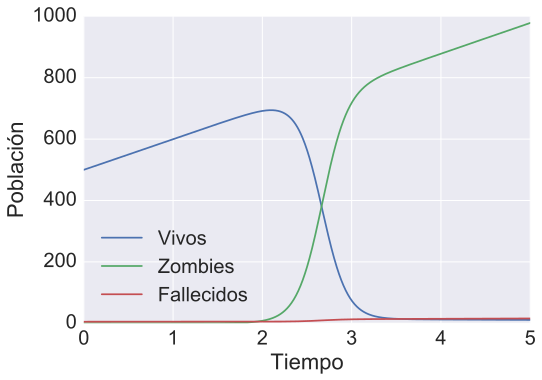

In [13]:
# plot results
plt.figure()
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombies')
plt.plot(t, F, label='Fallecidos')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend(loc=0)